## Satistics : Probability Distribution

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
sns.set()

In [2]:
df = pd.read_excel('data/data1.xlsx')
df

,no.,f,x,y,z
0,1,0.720482,0.737451,4.10,0.8695
1,2,0.812391,0.884248,3.65,0.5750
2,3,0.813530,0.863871,3.55,0.5125
3,4,0.532572,0.872902,3.85,0.6520
4,5,0.697305,0.891665,4.70,0.5400
5,6,0.733407,0.880975,0.70,0.7745
6,7,0.654187,0.733362,2.25,0.7130
7,8,0.709219,0.839979,-1.10,0.9320
8,9,0.750032,0.917038,-1.25,0.7335
9,10,0.713197,0.915913,0.90,0.7345


In [3]:
df.describe()

,no.,f,x,y,z
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.719786,0.851992,2.258333,0.619567
std,8.803408,0.118450,0.073565,1.871800,0.161012
min,1.000000,0.325209,0.638667,-1.250000,0.391500
25%,8.250000,0.700283,0.824983,0.762500,0.490875
50%,15.500000,0.771804,0.881080,2.825000,0.572750
75%,22.750000,0.797690,0.894979,3.625000,0.755875
max,30.000000,0.824820,0.941757,5.300000,0.932000


### 1. Normal distribution

In [4]:
column=['f','x','y','z']
c=['r','b','g','m']
n=30
mu=[]
sigma=[]
s=[]
for i in range(4):
    mu.append(np.mean(df[column[i]]))
    sigma.append(np.std(df[column[i]])) 
    s.append(np.random.normal(mu[i], sigma[i],30))


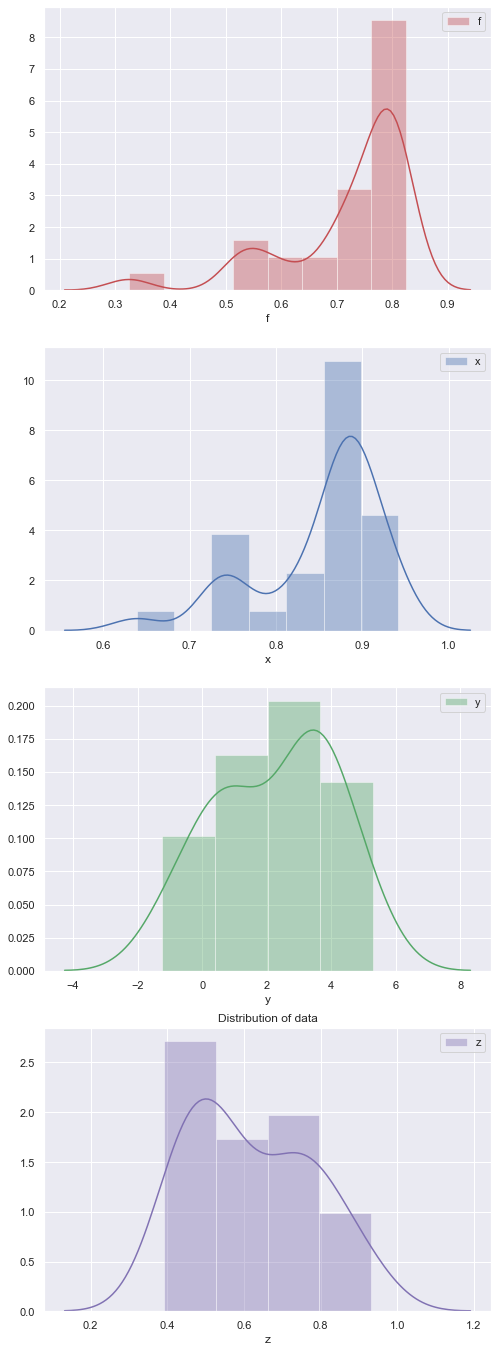

In [5]:
plt.figure(figsize = [8,24])
for i in range(4):
    plt.subplot(4,1,i+1)
    sns.distplot(df[column[i]],color=c[i],label=column[i])
    plt.legend()
plt.title('Distribution of data')    
plt.show()

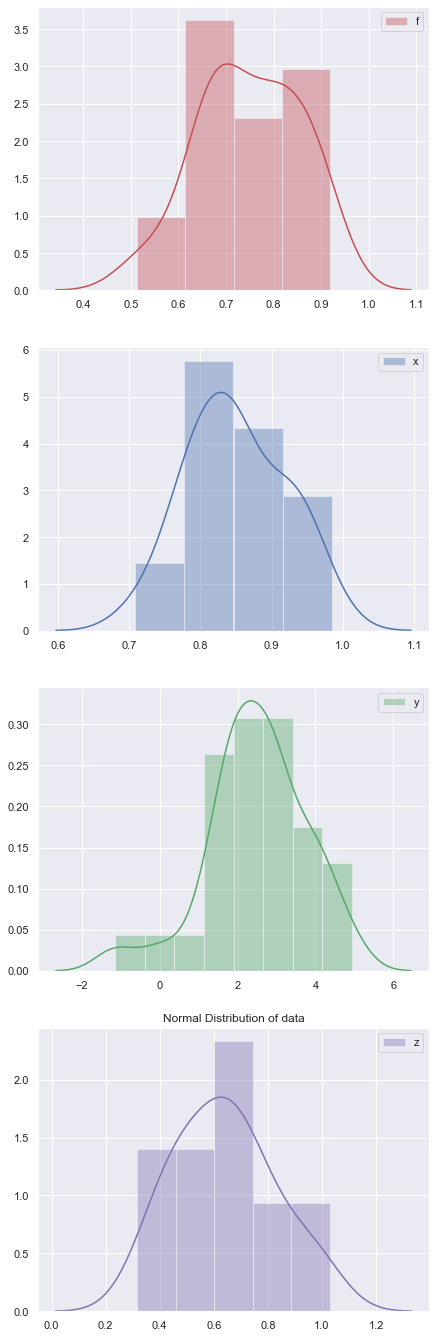

In [6]:
plt.figure(figsize = [7,24])
for i in range(4):
    plt.subplot(4,1,i+1)
    sns.distplot(s[i],color=c[i],label=column[i])
    plt.legend()
plt.title('Normal Distribution of data')      
plt.show()

### 2. Poison distribution

In [7]:
s1=[]
for i in range(4):
    s1.append(np.random.poisson(mu[i], 30))

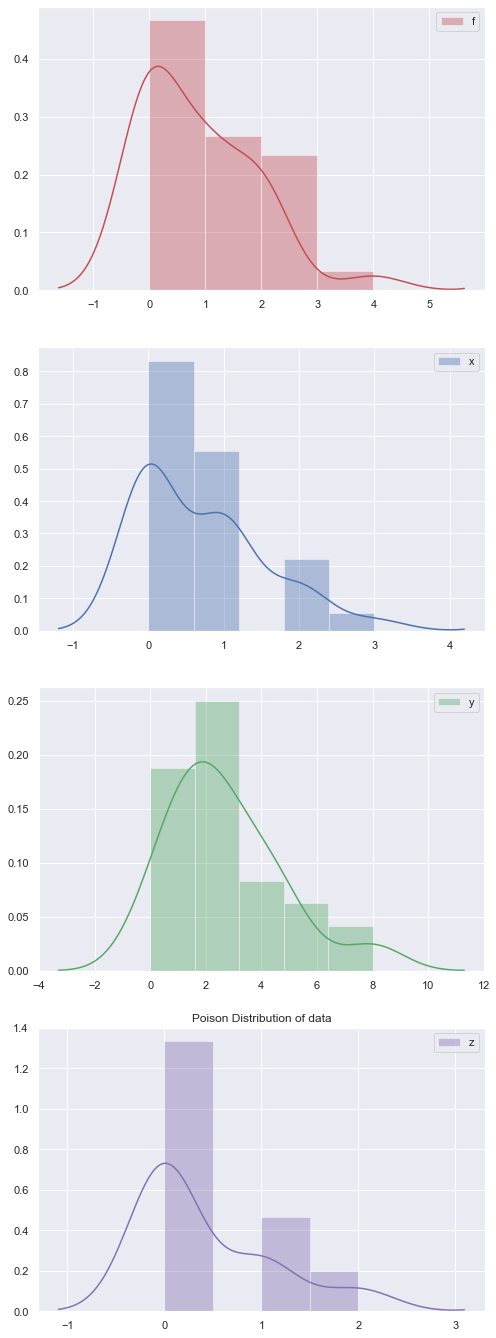

In [8]:
plt.figure(figsize = [8,24])
for i in range(4):
    plt.subplot(4,1,i+1)
    sns.distplot(s1[i],color=c[i],label=column[i])
    plt.legend()
plt.title('Poison Distribution of data')      
plt.show()    

### 3. Multinomial Distribution

**Tossing n-number of p-side dice**

In [9]:
# number of dice in one experiment
n = 6 

# number of face
p = 6

#number of experiment
N = 100

s4 = np.random.multinomial(n, [1/float(p)]*6, 100)
Mu=np.mean(s4)
Sigma=np.std(s4)
s5=np.random.normal(Mu, Sigma,100)
Mu,Sigma

(1.0, 0.9237604307034013)

In [10]:
s4[1:5]


array([[1, 1, 0, 0, 2, 2],
       [0, 0, 2, 2, 1, 1],
       [0, 1, 0, 3, 2, 0],
       [1, 0, 1, 2, 1, 1]])

In [11]:
df = pd.DataFrame(s4, columns= ['1','2','3','4','5','6'])

In [12]:
df

,1,2,3,4,5,6
0,1,0,1,2,1,1
1,1,1,0,0,2,2
2,0,0,2,2,1,1
3,0,1,0,3,2,0
4,1,0,1,2,1,1
...,...,...,...,...,...,...
95,1,0,1,0,0,4
96,1,0,1,2,1,1
97,2,1,1,2,0,0
98,1,1,0,1,1,2


In [13]:
freq=[]
for i in range(6):
    freq.append(np.sum(df.iloc[:,i]))
freq 


[98, 101, 75, 116, 110, 100]

In [14]:
np.sum(freq)

600

In [15]:
df1 = pd.DataFrame(freq,columns= ['Frequency'], index= ['1','2','3','4','5','6'])
df1

,Frequency
1,98
2,101
3,75
4,116
5,110
6,100


In [16]:
df1.index.names = ['Face'] #naming index
df1

,Frequency
Face,
1,98
2,101
3,75
4,116
5,110
6,100
